<a href="https://colab.research.google.com/github/botir2/YOLOv8_Custom_Dataset/blob/main/GIsan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

Tue Nov  5 12:31:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 45.8 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3GWM0LYrp77wlcs1M5vV")
project = rf.workspace("wetness").project("greenmodel")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset.location

'/content/greenModel-1'

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=40 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 316MB/s]
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/greenModel-1/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

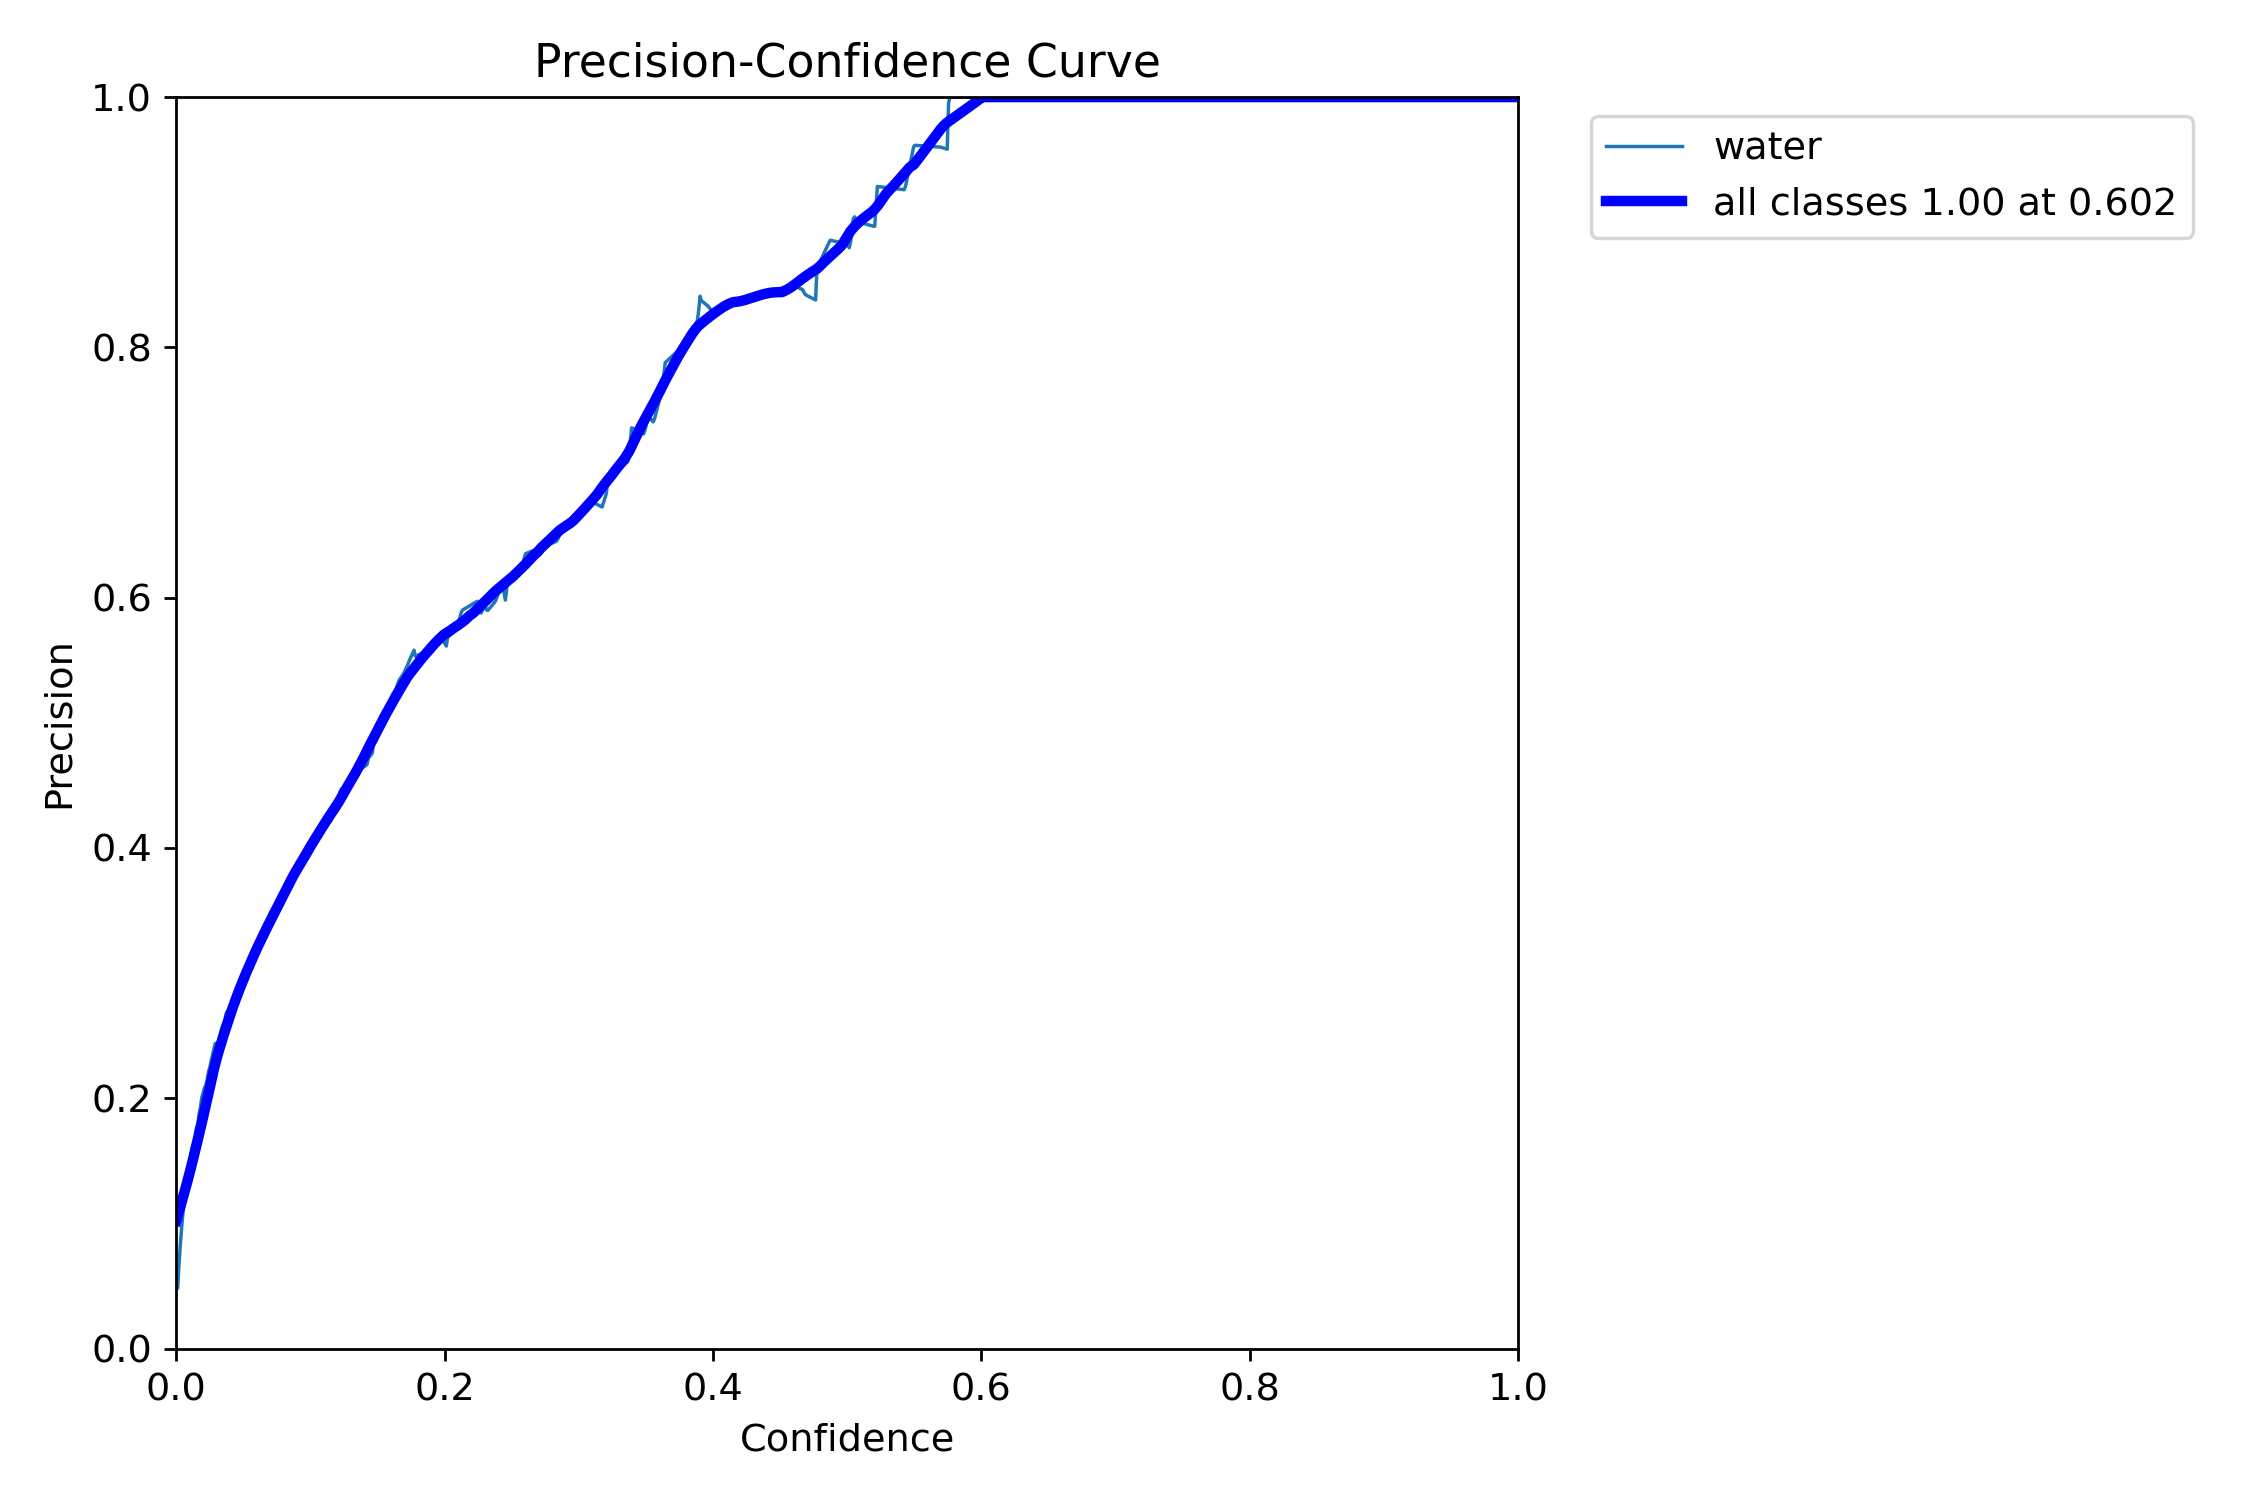

In [ ]:
Image("/content/runs/detect/train/P_curve.png", width=600)

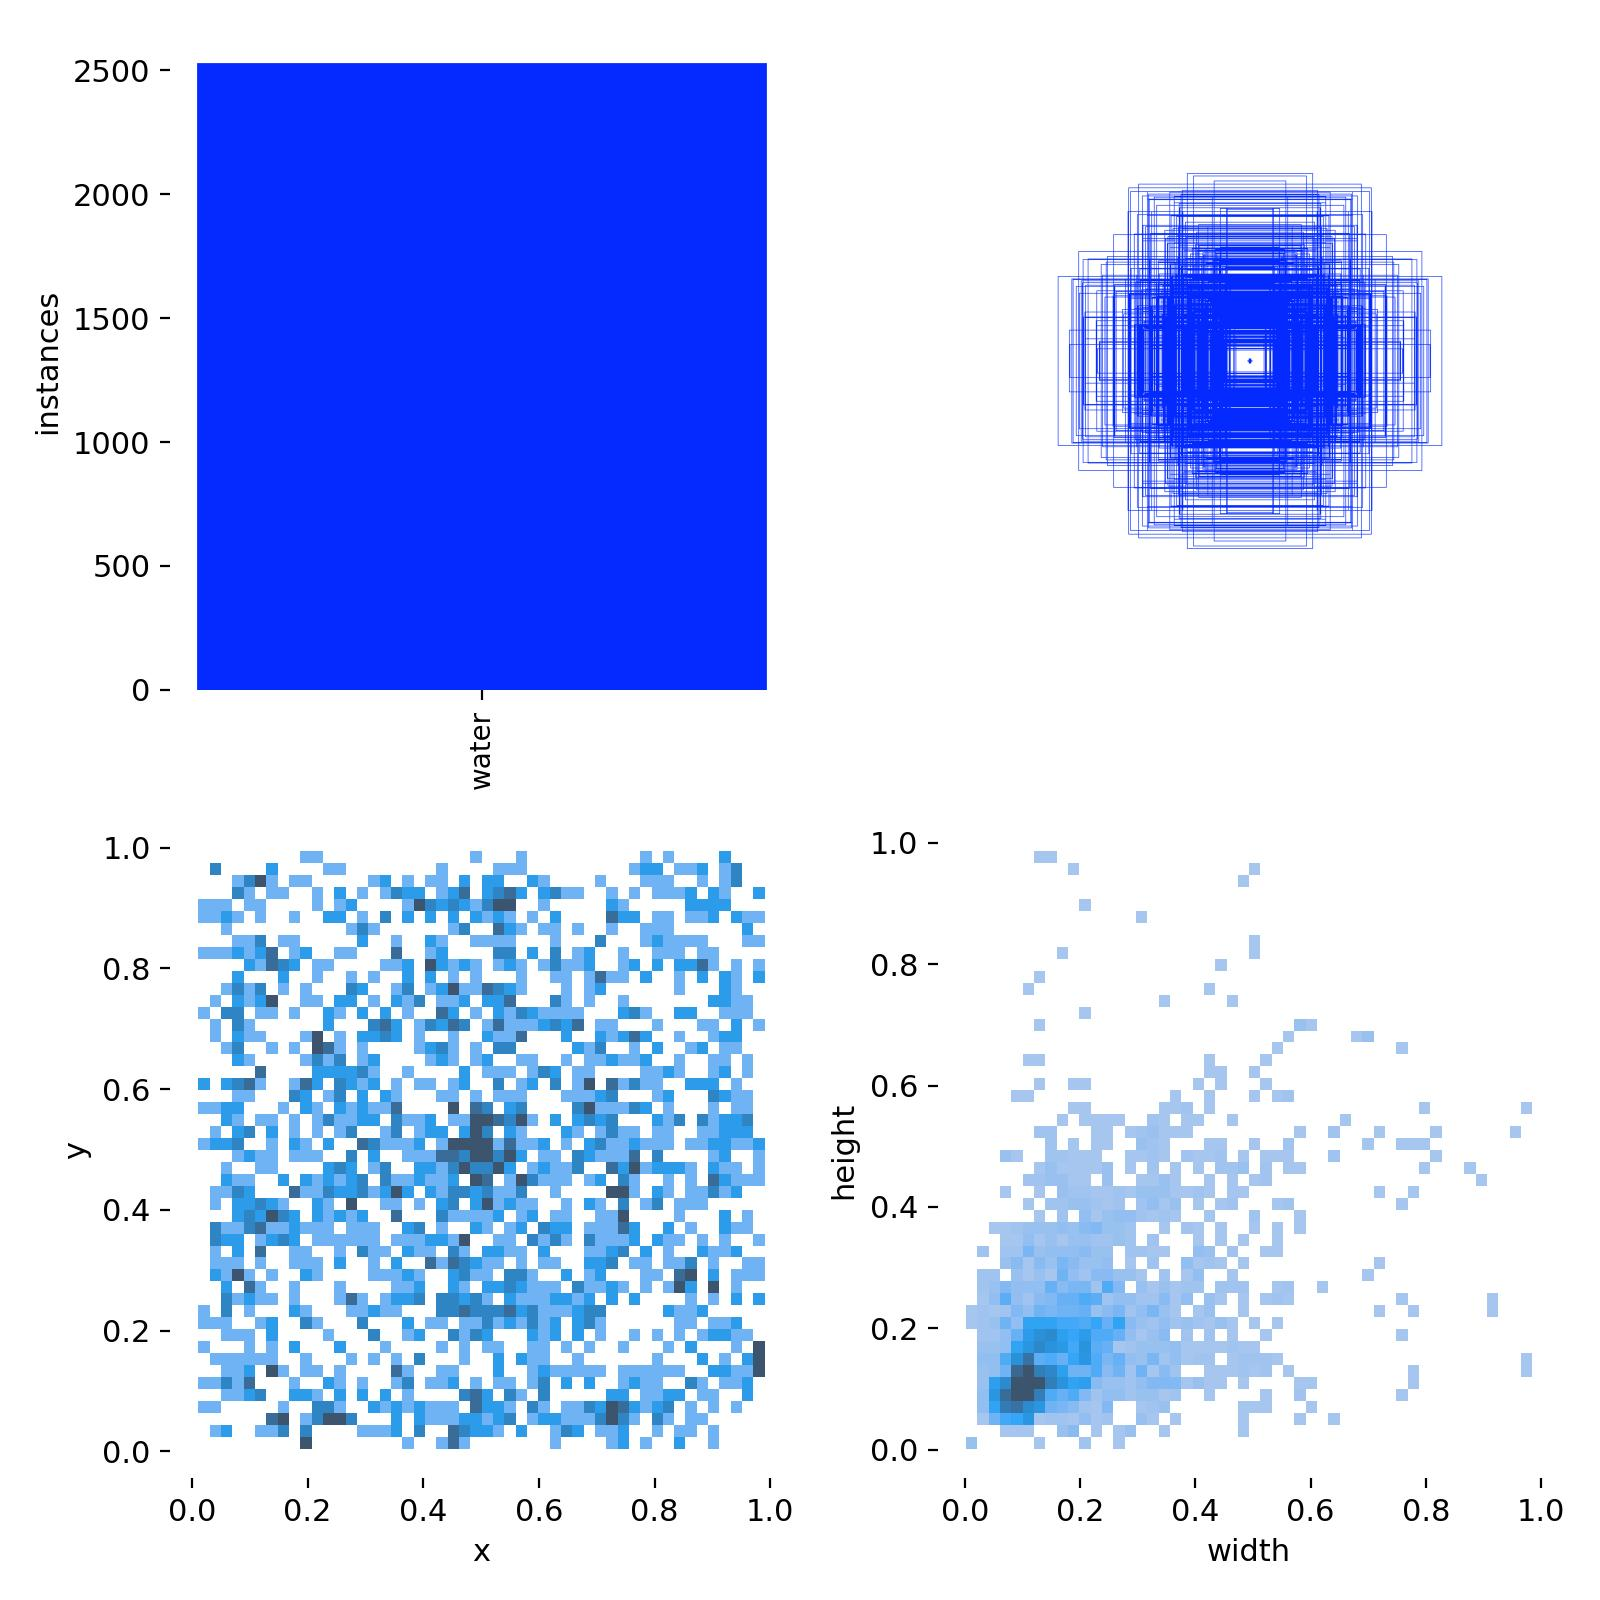

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

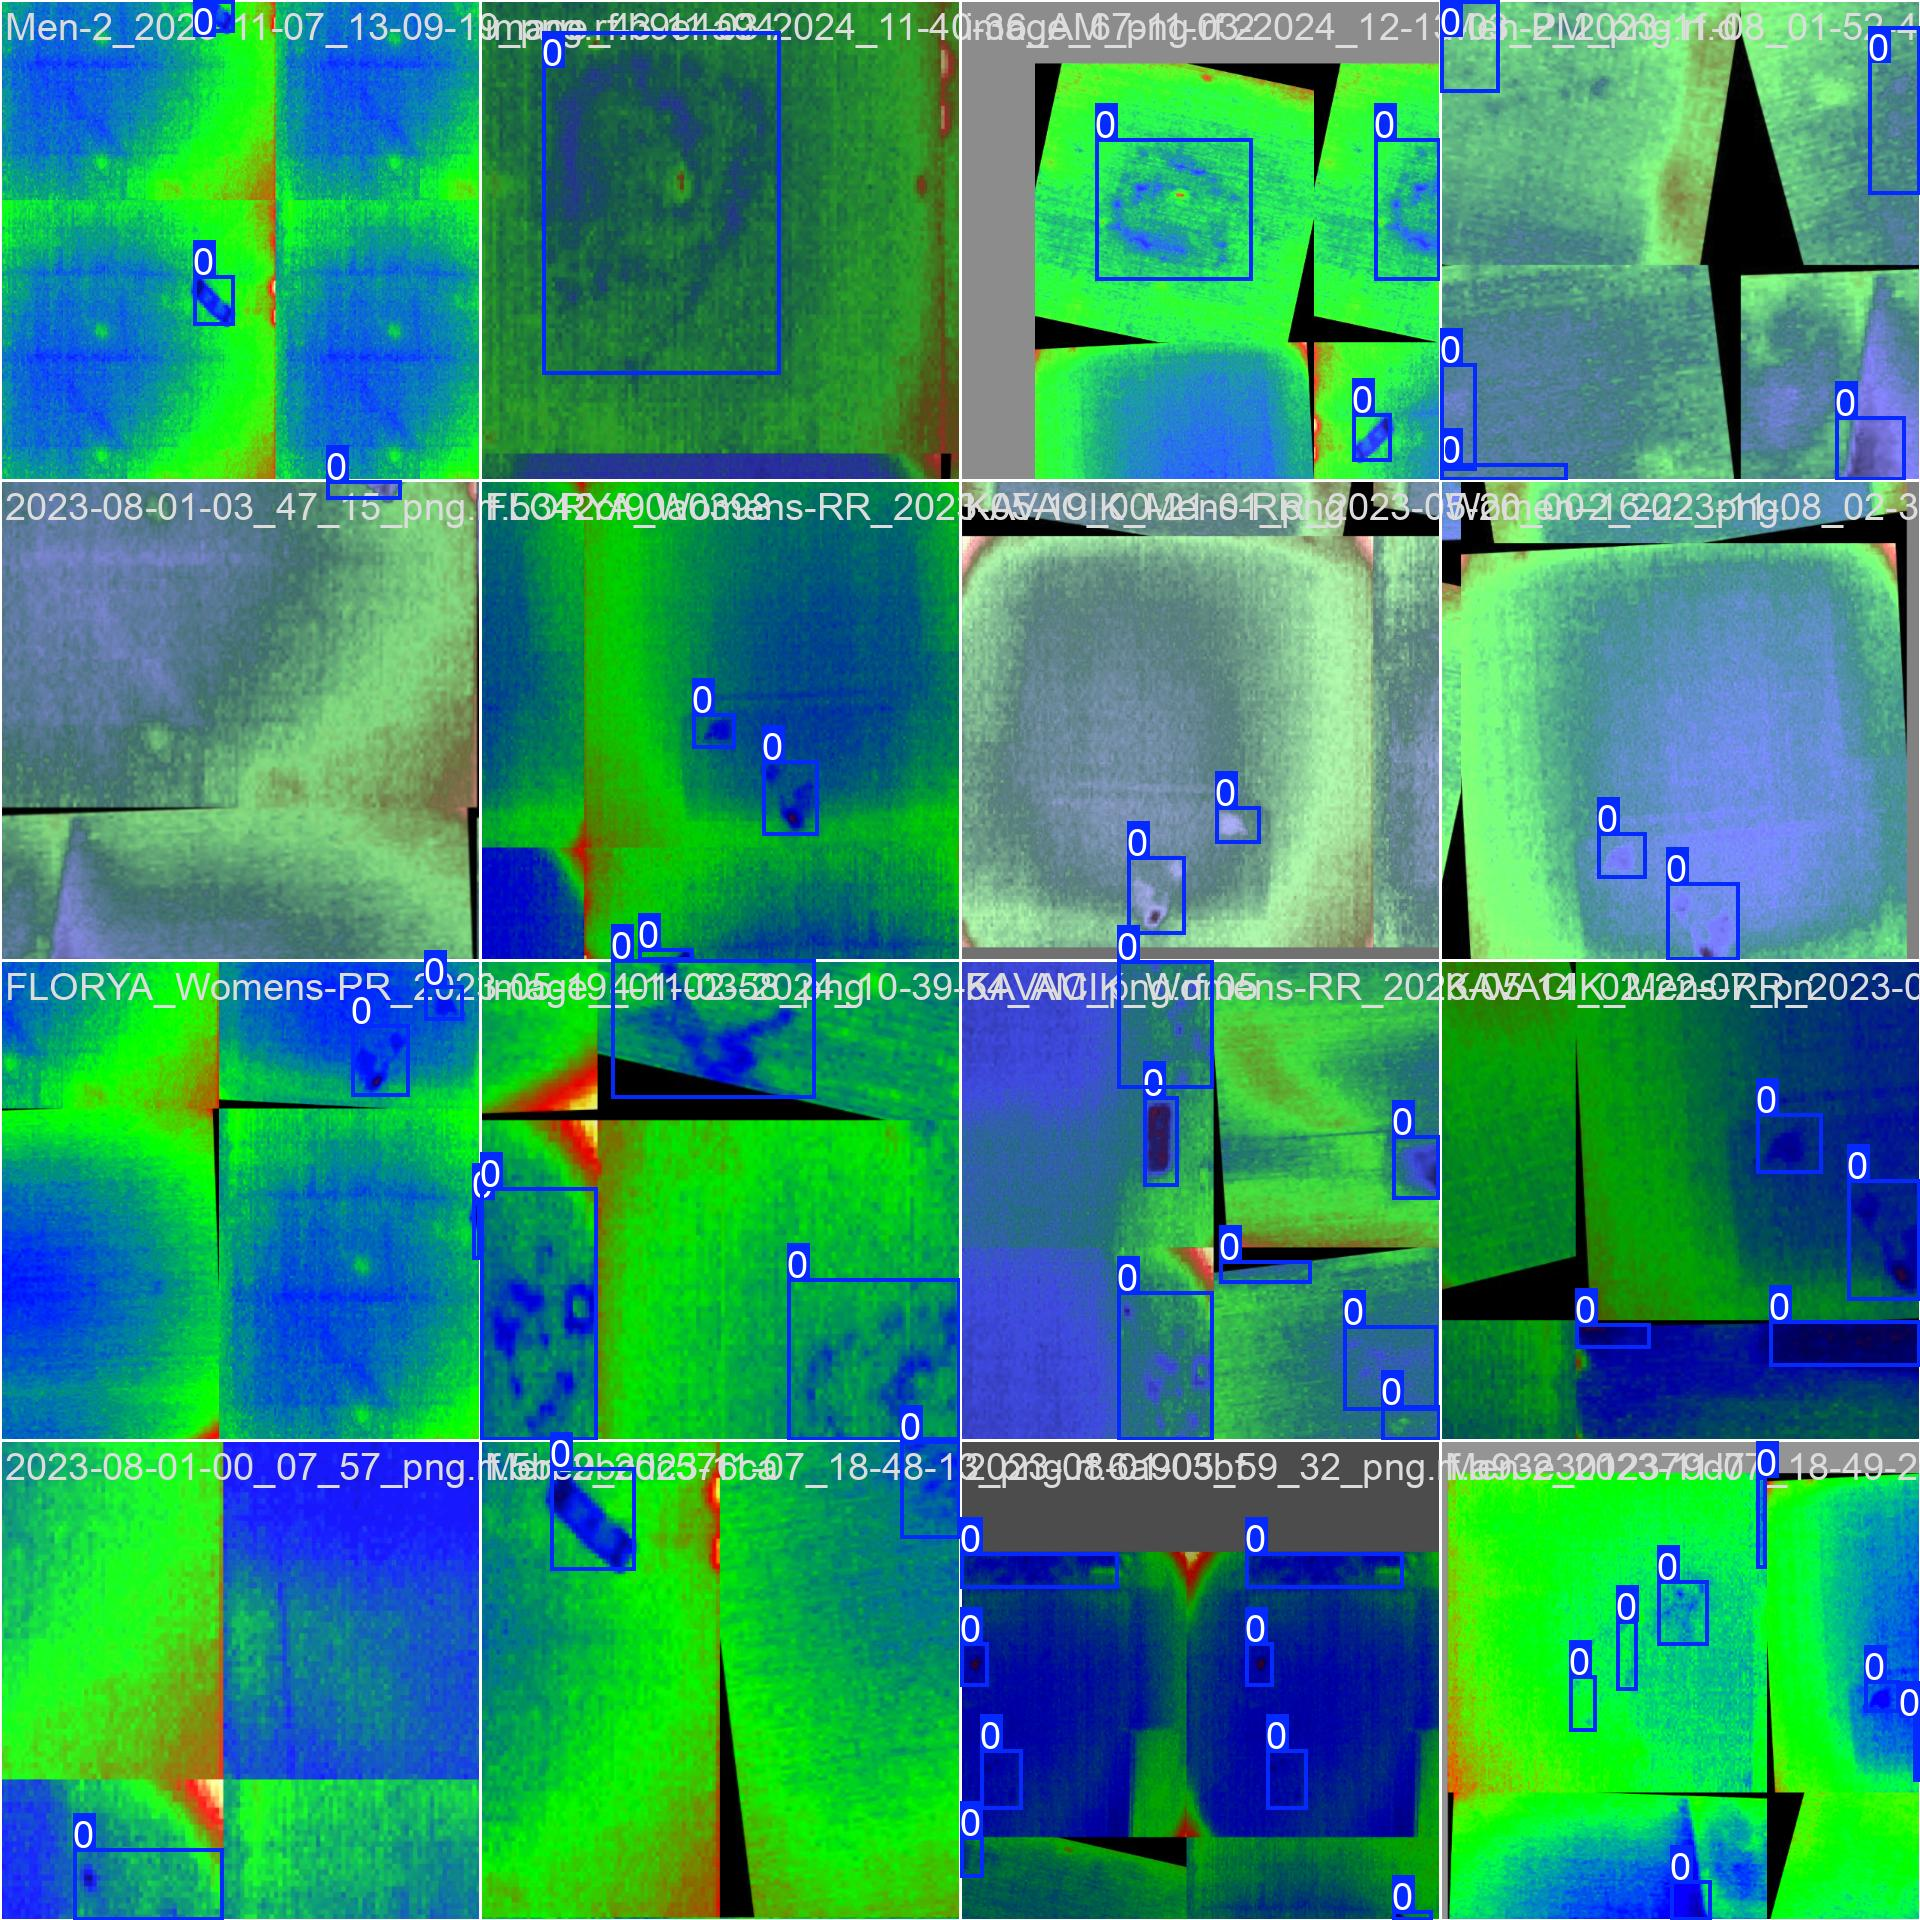

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

In [ ]:
!gdown "https://drive.google.com/uc?id=1iuIB_3vKBunhyxEPhuecWPAWgVY71BNF&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iuIB_3vKBunhyxEPhuecWPAWgVY71BNF&confirm=t
To: /content/best.pt
100% 5.47M/5.47M [00:00<00:00, 59.8MB/s]


In [ ]:
!gdown "https://drive.google.com/uc?id=1iuIB_3vKBunhyxEPhuecWPAWgVY71BNF&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iuIB_3vKBunhyxEPhuecWPAWgVY71BNF&confirm=t
To: /content/best.pt
100% 5.47M/5.47M [00:00<00:00, 273MB/s]


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source="/content/drive/MyDrive/GIS images/NDVI 2000.png" save=True

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/drive/MyDrive/GIS images/NDVI 2000.png: 640x512 1 water, 42.6ms
Speed: 5.5ms preprocess, 42.6ms inference, 541.0ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

# Find the latest prediction folder
latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)

# Display images (you can adjust the range or select specific images)
for img in glob.glob(f'{latest_folder}/*.jpg'):
    display(IPyImage(filename=img, width=600))
    print("\n")